In [6]:
# once i have wholegenome_offset.trees
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
from matplotlib import colors as mcolors
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 

In [7]:
!pwd

/global/scratch/users/tbellg/slim_grenenet_results/final_results_cteg_talk/final_results_es_dep_af


In [8]:
path = '/global/scratch/users/tbellg/slim_grenenet/results/'

In [9]:
results = os.listdir(path)

In [10]:
os.listdir(path + results[0])

['5',
 '1',
 'tree_seq_causalloci.trees',
 '4',
 'phenotypes.csv',
 '3',
 'loci_effectsize.csv']

In [11]:
phenotypes = pd.read_csv(path + results[0] + '/phenotypes.csv', usecols = ['0'])

In [12]:
all_phenos = {}
for i in results:
    phenotypes = pd.read_csv(path + i + '/phenotypes.csv', usecols = ['0'])
    all_phenos[i] = phenotypes['0'].to_list()

In [13]:
all_phenos = pd.DataFrame(all_phenos).melt()

In [14]:
all_phenos['pi'] = all_phenos['variable'].str.split('_').str[1].str.replace('pi', '').astype(int)

In [15]:
all_phenos['rep'] = all_phenos['variable'].str.split('_').str[2].astype(int)

In [16]:
all_phenos = all_phenos.drop('variable',axis=1)

In [17]:
mean_pheno = all_phenos.groupby(['pi', 'rep'])['value'].mean().reset_index()

In [18]:
mean_pheno.columns = ['pi', 'rep', 'mean_pheno']

In [19]:
std_pheno = all_phenos.groupby(['pi', 'rep'])['value'].std().reset_index()

In [20]:
std_pheno.columns = ['pi', 'rep', 'std_pheno']

In [21]:
all_phenos = all_phenos.merge(mean_pheno).merge(std_pheno)

In [22]:
all_phenos['new_opt0'] = all_phenos['mean_pheno'] #+ (1 * all_phenos['std_pheno'])

In [23]:
all_phenos['new_opt1'] = all_phenos['mean_pheno'] + (1 * all_phenos['std_pheno'])

In [24]:
all_phenos['new_opt2'] = all_phenos['mean_pheno'] + (2 * all_phenos['std_pheno'])

In [25]:
all_phenos['adj_var'] = 0.1 * (all_phenos['std_pheno'])**2

<Axes: xlabel='pi', ylabel='fitness_new_opt0'>

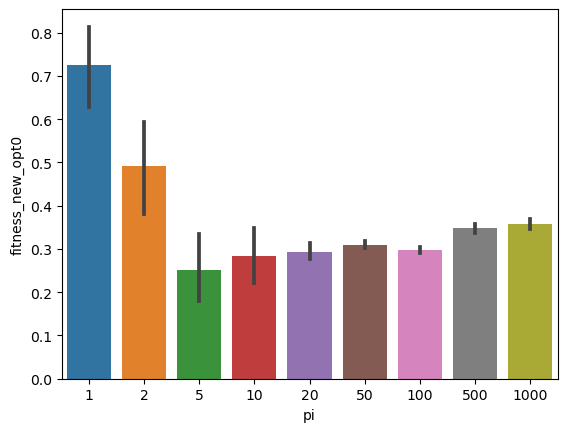

In [26]:
all_phenos['fitness_new_opt0'] = np.exp(-0.5 * ((all_phenos['value'] - all_phenos['new_opt0'])**2) / all_phenos['adj_var'])
all_phenos['fitness_new_opt1'] = np.exp(-0.5 * ((all_phenos['value'] - all_phenos['new_opt1'])**2) / all_phenos['adj_var'])
all_phenos['fitness_new_opt2'] = np.exp(-0.5 * ((all_phenos['value'] - all_phenos['new_opt2'])**2) / all_phenos['adj_var'])

mean_initial_fitness = all_phenos.groupby(['pi', 'rep'])['fitness_new_opt0'].mean().reset_index()
sns.barplot(data = mean_initial_fitness, y = 'fitness_new_opt0', x = 'pi')

<Axes: xlabel='pi', ylabel='fitness_new_opt0'>

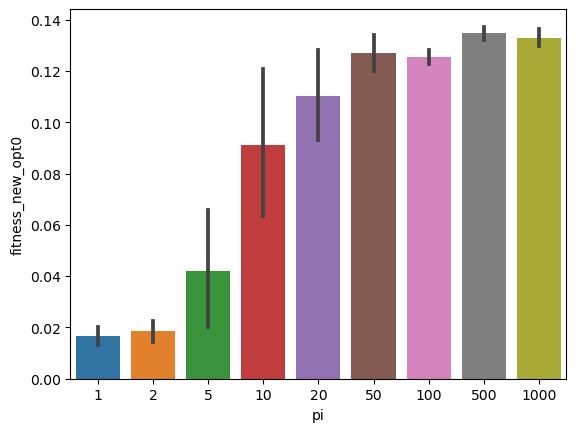

In [27]:
var_initial_fitness = all_phenos.groupby(['pi', 'rep'])['fitness_new_opt0'].var().reset_index()
sns.barplot(data = var_initial_fitness, y = 'fitness_new_opt0', x = 'pi')

<Axes: xlabel='pi', ylabel='fitness_new_opt1'>

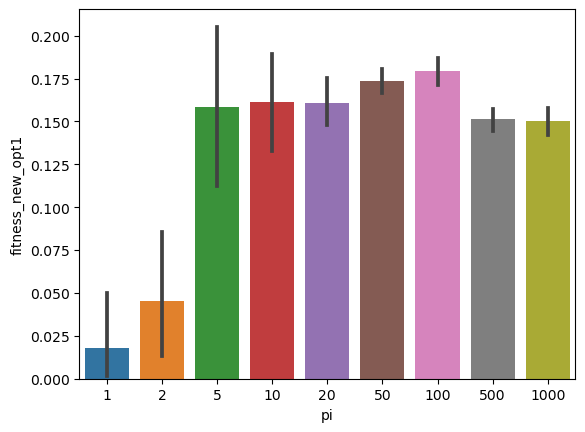

In [109]:
mean_initial_fitness = all_phenos.groupby(['pi', 'rep'])['fitness_new_opt1'].mean().reset_index()
sns.barplot(data = mean_initial_fitness, y = 'fitness_new_opt1', x = 'pi')

<Axes: xlabel='pi', ylabel='fitness_new_opt1'>

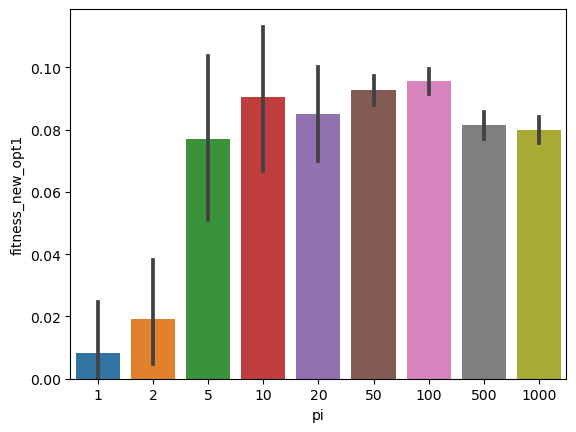

In [110]:
var_initial_fitness = all_phenos.groupby(['pi', 'rep'])['fitness_new_opt1'].var().reset_index()
sns.barplot(data = var_initial_fitness, y = 'fitness_new_opt1', x = 'pi')

In [69]:
all_phenos_poly = all_phenos[all_phenos['pi']==500]

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='value', ylabel='Count'>

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


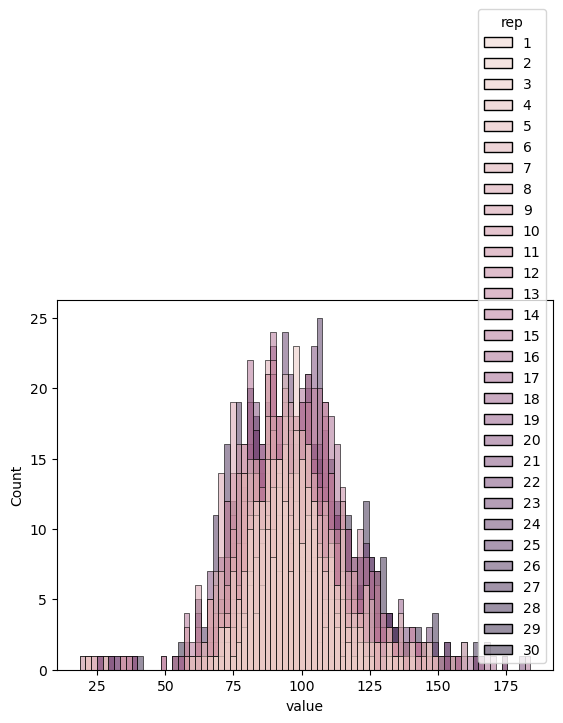

In [70]:
sns.histplot(data = all_phenos_poly, x = 'value', hue = 'rep' )

In [71]:
all_phenos_poly1 = all_phenos_poly[all_phenos_poly['rep']==1]

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='value', ylabel='Count'>

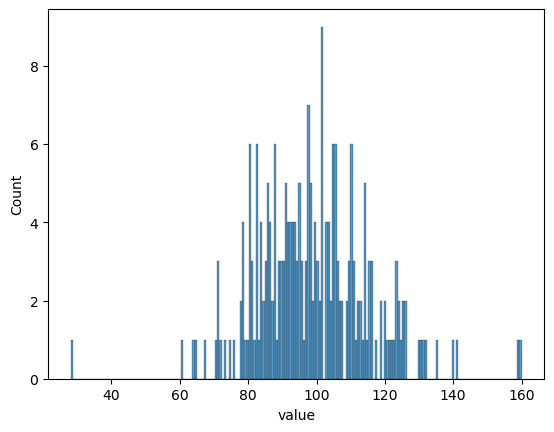

In [73]:
sns.histplot(data = all_phenos_poly1, x = 'value', bins=200)

In [ ]:
adj_variance = Vs * (sd_pheno)**2